<a href="https://colab.research.google.com/github/Nuranisah05/Machine_Learning_2025/blob/main/Laihan13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install kaggle


In [10]:
kaggle = '/content/kaggle.json'

In [11]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
from zipfile import ZipFile
import os
file_name = '/content/handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print("Done")

Done


In [16]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [17]:
len(data_0)

2236

In [18]:
# Melakukan preprocessing data dari gambar menjadi numerik
import cv2
import numpy as np

X = []
y = []

dataset_path = "/content/dataset"

for label in range(10):  # 0 sampai 9
    folder_path = os.path.join(dataset_path, str(label))

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        img = cv2.resize(img, (28, 28))
        img = img / 255.0  # normalisasi

        X.append(img.flatten())  # flatten 28x28 → 784
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (21555, 784)
Shape y: (21555,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

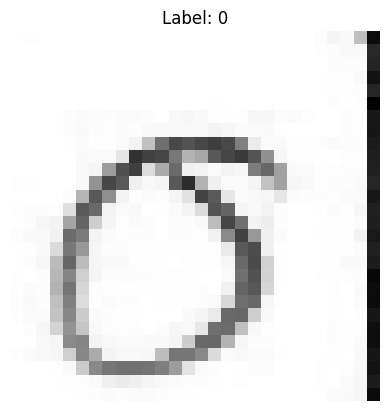

In [25]:
# Mengecek satu sampel data
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')


In [45]:
# Melakukan Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(17244, 784) (4311, 784)


In [46]:
# Melakukan Encoding pada dataset
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print(y_train.shape)


(17244, 10)


In [47]:
print("Output model :", model.output_shape)
print("Label shape  :", y_train.shape)

Output model : (None, 10)
Label shape  : (17244, 10)


In [48]:
# Membangun model ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Kompilasi model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
# Training model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/20
108/108 - 2s - 17ms/step - accuracy: 0.8944 - loss: 0.3419 - val_accuracy: 0.8991 - val_loss: 0.2896
Epoch 2/20
108/108 - 1s - 5ms/step - accuracy: 0.8997 - loss: 0.2686 - val_accuracy: 0.9107 - val_loss: 0.2345
Epoch 3/20
108/108 - 1s - 5ms/step - accuracy: 0.9076 - loss: 0.2403 - val_accuracy: 0.9142 - val_loss: 0.2175
Epoch 4/20
108/108 - 1s - 5ms/step - accuracy: 0.9139 - loss: 0.2275 - val_accuracy: 0.9208 - val_loss: 0.2040
Epoch 5/20
108/108 - 1s - 5ms/step - accuracy: 0.9190 - loss: 0.2140 - val_accuracy: 0.9252 - val_loss: 0.1978
Epoch 6/20
108/108 - 1s - 5ms/step - accuracy: 0.9219 - loss: 0.2139 - val_accuracy: 0.9255 - val_loss: 0.1946
Epoch 7/20
108/108 - 1s - 8ms/step - accuracy: 0.9220 - loss: 0.2055 - val_accuracy: 0.9266 - val_loss: 0.2070
Epoch 8/20
108/108 - 1s - 13ms/step - accuracy: 0.9241 - loss: 0.2008 - val_accuracy: 0.9252 - val_loss: 0.1957
Epoch 9/20
108/108 - 1s - 6ms/step - accuracy: 0.9274 - loss: 0.1967 - val_accuracy: 0.9252 - val_loss: 0.1968

In [41]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss data uji: {loss:.4f}")
print(f"Akurasi data uji: {accuracy:.4f}")



Loss data uji: 0.1873
Akurasi data uji: 0.9293


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


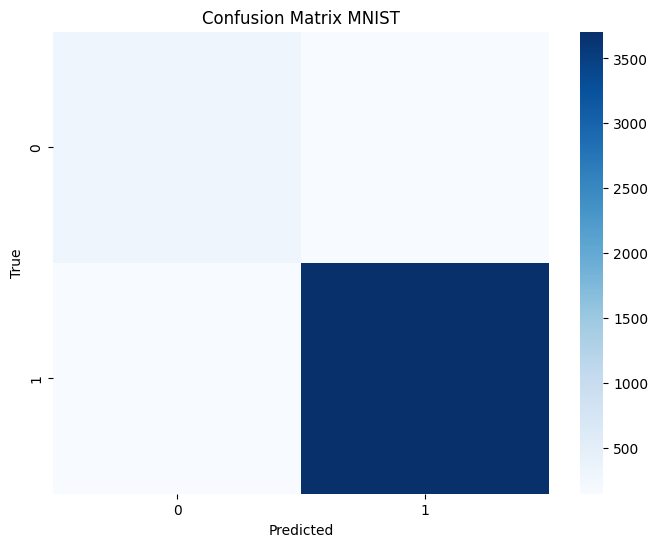

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

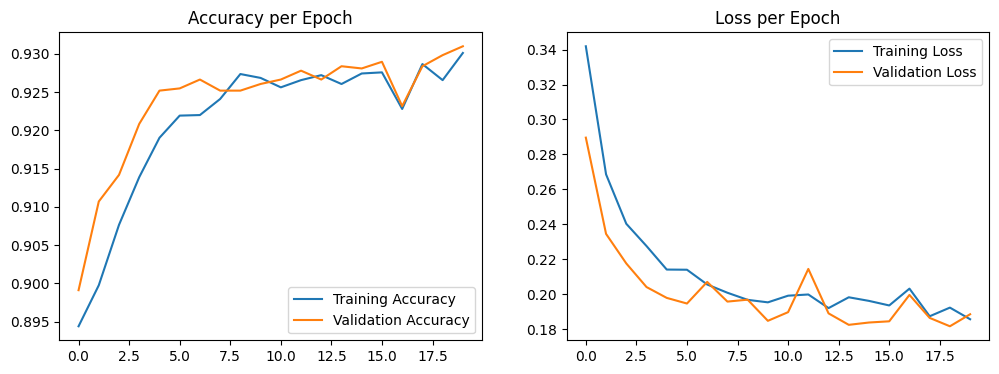

In [44]:
# Visualisasi Accurasi dan Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss per Epoch')

plt.show()
